In [2]:
import yfinance as yf
import pandas as pd

ticker = 'AAPL'

# Fetch data
stock_data = yf.download(ticker, start='2015-01-01', end='2023-12-31', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [3]:
print(stock_data.info()) # data types
print(stock_data.describe()) # summary statistics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2264 non-null   float64
 1   (Close, AAPL)      2264 non-null   float64
 2   (High, AAPL)       2264 non-null   float64
 3   (Low, AAPL)        2264 non-null   float64
 4   (Open, AAPL)       2264 non-null   float64
 5   (Volume, AAPL)     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean      81.566078    84.026440    84.876609    83.092088    83.956509   
std       56.108762    56.034699    56.611354    55.396020    55.979856   
min       20.647457    22.584999    22.917500    22.367500  

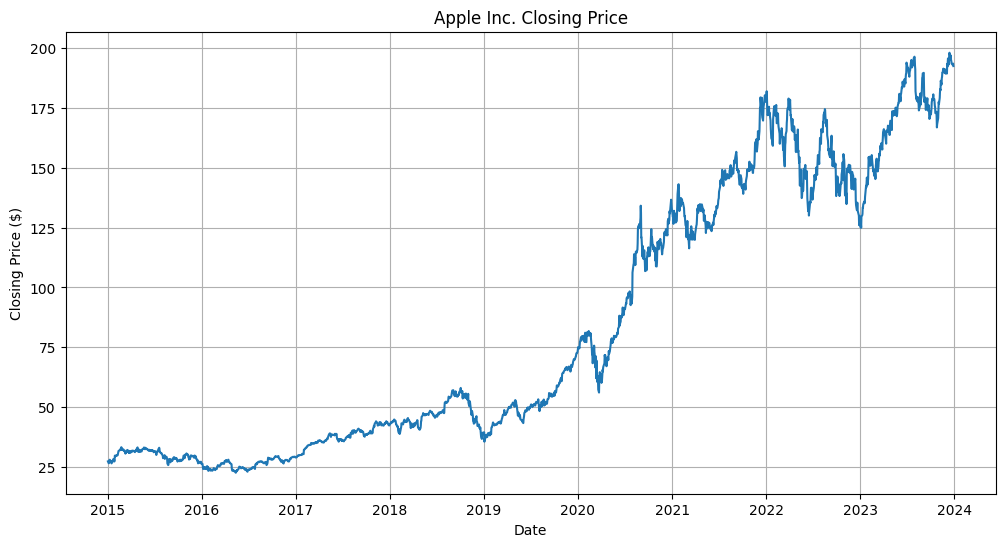

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'])
plt.title('Apple Inc. Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

In [6]:
# Check for missing values
print(stock_data.isnull().sum())

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


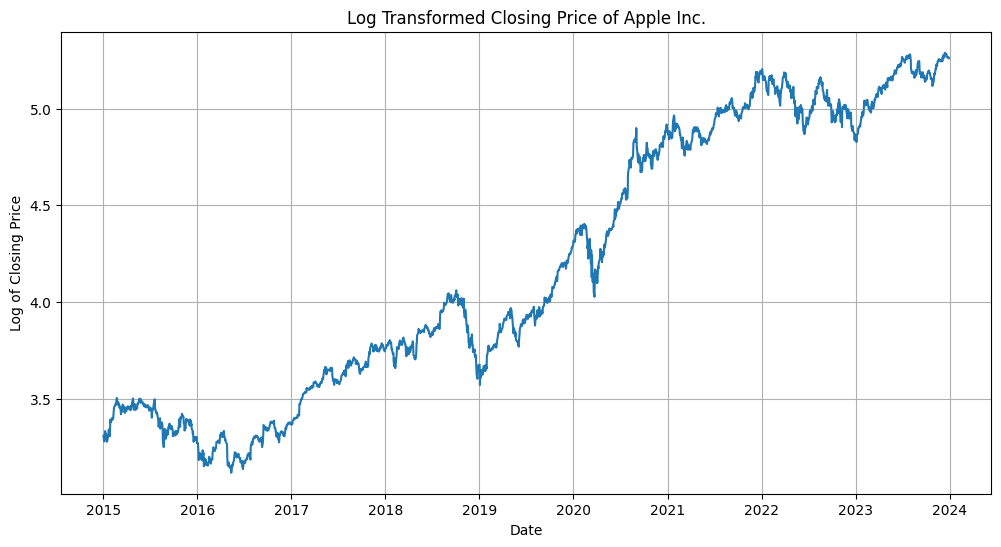

In [7]:
import numpy as np

df_close = stock_data['Close']

# Apply log transformation
df_log = np.log(df_close)

plt.figure(figsize=(12,6))
plt.plot(df_log)
plt.title('Log Transformed Closing Price of Apple Inc.')
plt.xlabel('Date')
plt.ylabel('Log of Closing Price')
plt.grid(True)
plt.show()

In [8]:
print(df_close.describe())

Ticker         AAPL
count   2264.000000
mean      84.026440
std       56.034699
min       22.584999
25%       35.439376
50%       53.868752
75%      141.710003
max      198.110001


1. 25%-50%-75% quartiles show wide jump from 53→141
2. Skewed distribution
    1. mean (84.03) is higher than median (53.87), indicating right skewness (tail towards high prices)
3. High Variability
    1. standard deviation of 56 is 66% of the mean, showing high volatility - typical for long term stock data

<Figure size 1200x600 with 0 Axes>

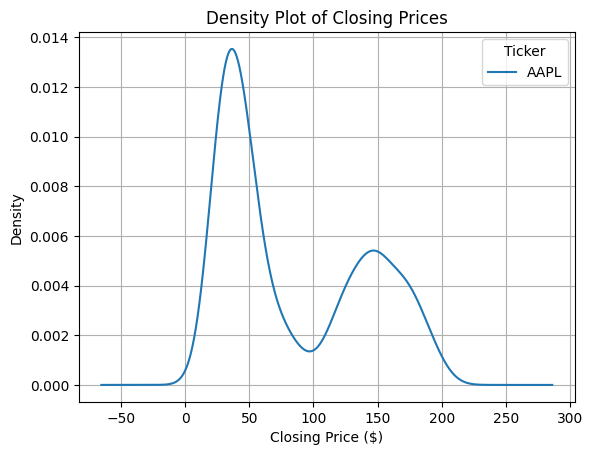

In [9]:
# Density plot
plt.figure(figsize=(12,6))
df_close.plot(kind='kde')
plt.title('Density Plot of Closing Prices')
plt.xlabel('Closing Price ($)')
plt.grid(True)
plt.show()

1. Kernel Density Estimation (KDE)
    1. KDE is a smoothed version of a histogram, estimating the probability density function (PDF) of the variable
    2. Density doesn’t represent probability directly but the area under the curve sums to 1, so it tells us how “common” different price ranges are
2. Observations
    1. Bimodal
        1. Two distinct peaks
        2. suggests stock price spent a lot of time in these two regions
    2. Left tail
        1. long left tail extending below 0, likely due to KDE bandwidth smoothing over into negative territory
    3. Wide price range
        1. significant price growth over time

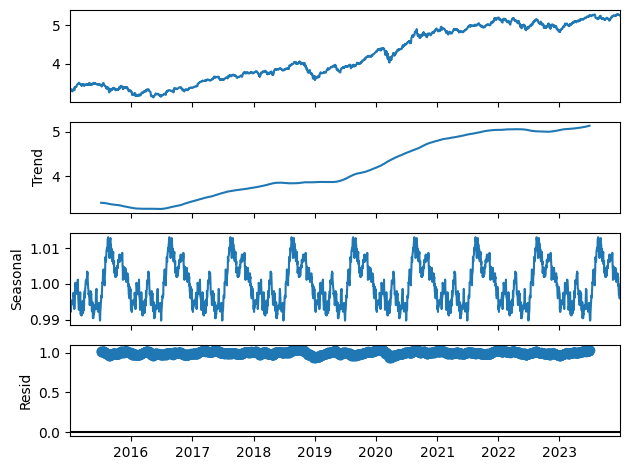

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df_log, model='multiplicative', period=252)  # Approximate trading days in a year

# Plot decomposition
result.plot()
plt.show()


1. Log-transformed time series
2. Trend
    1. Upward trend
    2. There are plateaus or slowdowns in some periods
3. Seasonal
    1. Isolated repeating patterns that occur with a fixed period (period =252)
    2. Fluctuates slightly around 1 (since its multiplicative)
    3. suggests a mild but consistent season effect perhaps related to calendar based patterns like quarterly earnings, fiscal cycles
4. Residual (Noise)
    1. This is what’s left over after removing trend and seasonality
    2. ideally this should look like white noise - no trend or seasonality
    3. residuals are centered close to 1 (due to multiplicative) and appear relatively stable
    4. some variance remains,
5. Conclusion
    1. Strong trend, mild seasonality, and low residual noise